In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from tabulate import tabulate
import iexfinance as iex
import chart_studio.plotly as py
from iexfinance.refdata import get_symbols
from iexfinance.stocks import get_historical_data
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import zscore
%matplotlib inline

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df = pd.read_csv("trump_tweets.csv") 
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,LOUISIANA — Tomorrow you will head to the poll...,10/12/2019 3:49,9706,35425,False,1.182870e+18
1,Twitter for iPhone,Louisiana REPUBLICANS thank you for a great ev...,10/12/2019 3:48,10626,40844,False,1.182870e+18
2,Twitter for iPhone,“I never saw so many subpoenas!” @ShannonBream...,10/12/2019 3:25,15523,56841,False,1.182860e+18
3,Twitter for iPhone,So funny to watch Steve Kerr grovel and pander...,10/12/2019 3:25,20293,99524,False,1.182860e+18
4,Twitter for iPhone,WHERE’S HUNTER?,10/12/2019 2:58,26280,110222,False,1.182850e+18


In [2]:
sentiment = df.apply(lambda x : analyzer.polarity_scores(x['text']), axis=1)
#df['Negative'] =sentiment.apply(lambda x : x.get('neg') )
#df['Neutral'] =sentiment.apply(lambda x : x.get('neu') )
#df['Postive'] =sentiment.apply(lambda x : x.get('pos') )
df['Compound'] =sentiment.apply(lambda x : x.get('compound') )
df['Compound_Zscore'] = df['Compound']-df['Compound'].mean()/df['Compound'].std()
df = df.drop(columns=["source","id_str"])
df['created_at'] = pd.to_datetime(df['created_at'])
df = df.rename(columns={'created_at': 'Date'})
df = df[~df['text'].str.contains("RT @")]
df


,text,Date,retweet_count,favorite_count,is_retweet,Compound,Compound_Zscore
0,LOUISIANA — Tomorrow you will head to the poll...,2019-10-12 03:49:00,9706,35425,False,0.6892,0.385913
1,Louisiana REPUBLICANS thank you for a great ev...,2019-10-12 03:48:00,10626,40844,False,0.8945,0.591213
2,“I never saw so many subpoenas!” @ShannonBream...,2019-10-12 03:25:00,15523,56841,False,-0.9284,-1.231687
3,So funny to watch Steve Kerr grovel and pander...,2019-10-12 03:25:00,20293,99524,False,-0.5266,-0.829887
4,WHERE’S HUNTER?,2019-10-12 02:58:00,26280,110222,False,0.0000,-0.303287
...,...,...,...,...,...,...,...
15248,Well the year has officially begun. I have man...,2016-01-01 23:00:00,2642,8495,False,0.6325,0.329213
15249,@sprinklermanus: @CNN @realDonaldTrump they're...,2016-01-01 21:29:00,933,3330,False,0.7351,0.431813
15250,@jallenaip: Hillary said she was in a Fog of W...,2016-01-01 06:08:00,2721,7490,False,-0.8478,-1.151087
15251,Happy New Year from #MarALago! Thank you to my...,2016-01-01 06:07:00,1948,8258,False,0.9230,0.619713


In [3]:
#df.to_csv('trump_tweeets_with_sentiment.csv')

In [103]:
df_china = df[(df['text'].str.contains("tariffs")) | (df['text'].str.contains("Tariffs"))]
#df_china = df[~df['text'].str.contains("RT@")]
df_china = df_china[(df_china['Compound'] < -0.5) | (df_china['Compound'] > 0.5)]
df_china
#df['two'].between(-0.5, 0.5, inclusive=False)
#df = df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]
#df_china.head(100)


,text,Date,retweet_count,favorite_count,is_retweet,Compound,Compound_Zscore
213,.@60Minutes “forgot” to report that we are hel...,2019-10-06 23:54:00,20112,71366,False,0.8553,0.552013
374,The U.S. won a $7.5 Billion award from the Wor...,2019-10-03 10:00:00,25811,109082,False,0.7845,0.481213
929,....on October 1st we have agreed as a gesture...,2019-09-11 23:17:00,10299,51280,False,0.7906,0.487313
1161,“Brazil will allow more American Ethanol to en...,2019-09-03 02:37:00,14075,67742,False,0.6808,0.377513
1167,“Brazil will allow more American Ethanol to en...,2019-09-02 21:58:00,5539,21596,False,0.6808,0.377513
...,...,...,...,...,...,...,...
8118,Very thankful for President Xi of China’s kind...,2018-04-10 18:30:00,22531,106429,False,0.9577,0.654413
8140,The United States hasn’t had a Trade Surplus w...,2018-04-07 18:03:00,22193,90487,False,-0.6996,-1.002887
8292,The European Union wonderful countries who tre...,2018-03-10 21:29:00,23972,99649,False,-0.7470,-1.050287
8302,Spoke to PM @TurnbullMalcolm of Australia. He ...,2018-03-09 22:48:00,17200,78494,False,0.9144,0.611113


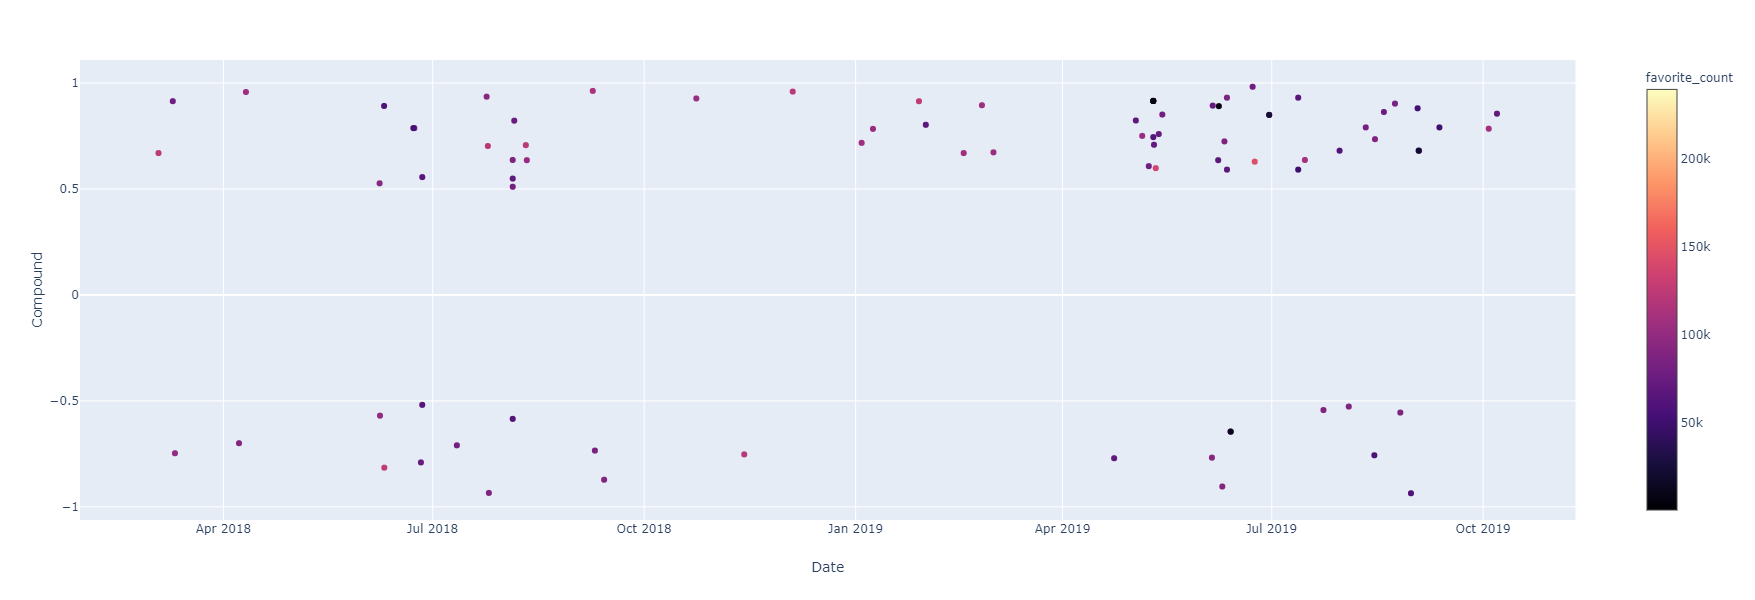

In [104]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df_china, x="Date", 
                 y="Compound",
                 color="favorite_count", 
                 color_continuous_scale='Magma',
                 hover_data=["text"])
fig.show()

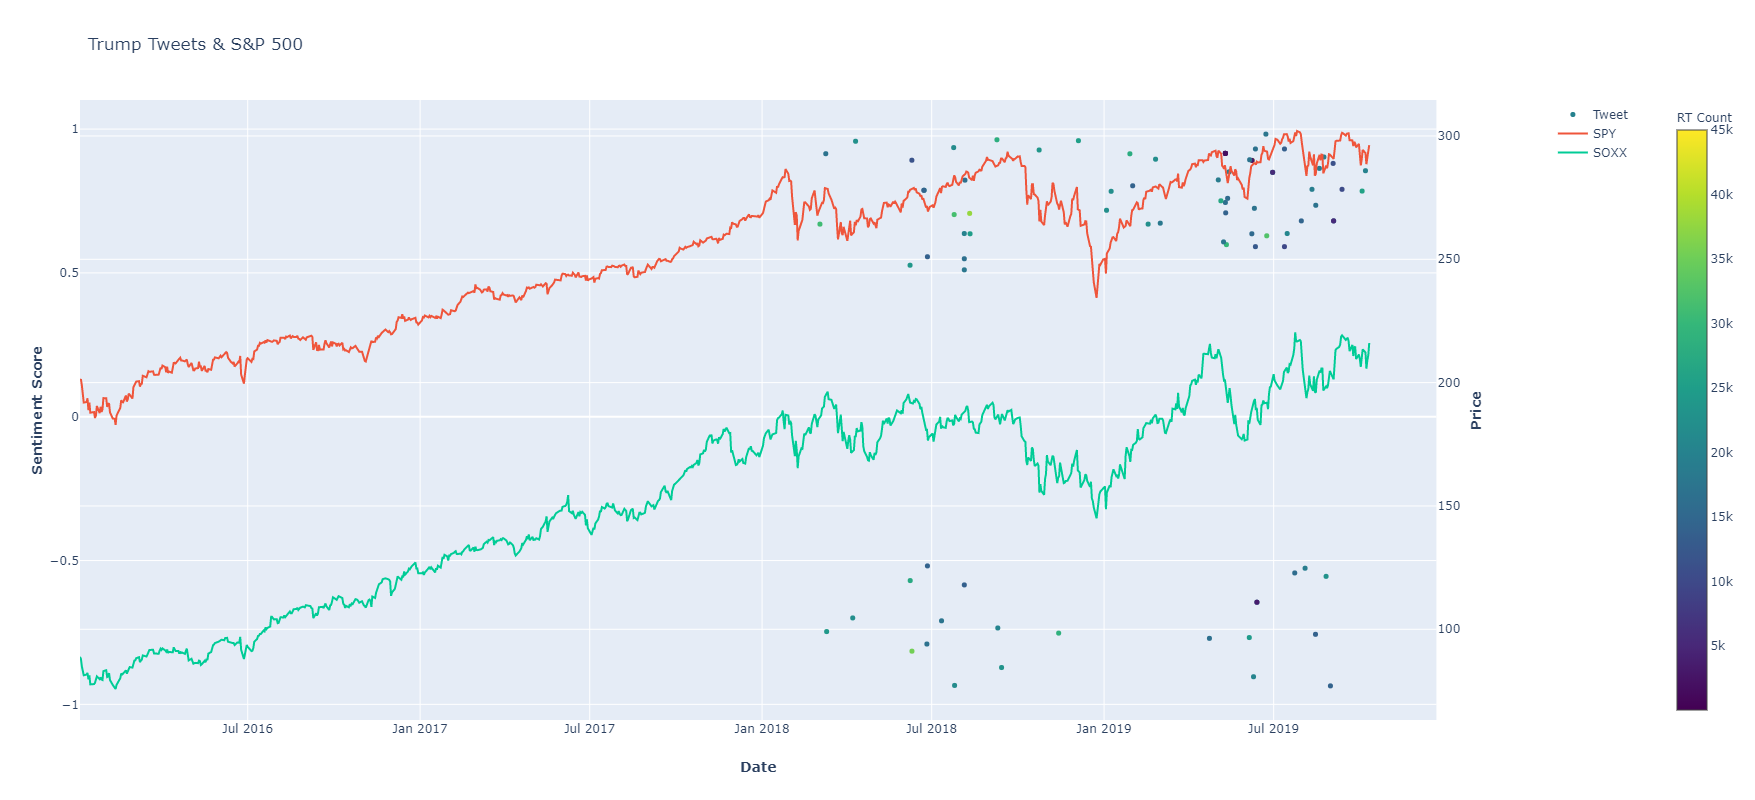

In [105]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(
    x = df_china.Date, 
    y = df_china.Compound, 
    name="Tweet", 
    mode = 'markers', 
        marker=dict(
        size=5,
        cmax=45000,
        cmin=50,
        color=df_china.retweet_count,
        colorbar=dict(
            title="RT Count",x=1.1
        ),
        colorscale="Viridis"
    ),
    hovertext=df_china.text),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x = df_closing_price.Date, y=df_closing_price['SPY'], name="SPY"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x = df_closing_price.Date, y=df_closing_price['SOXX'], name="SOXX"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Trump Tweets & S&P 500",
    width=1600,
    height=800,
)


# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Sentiment Score</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Price</b>", secondary_y=True)

fig.show()



In [17]:
"""
tickers = ["SPY","CARZ","SOXX","SOYB"]
end_date = '2019-10-12'
start_date = '2016-01-01'


df_closing_price = get_historical_data(tickers, start_date, end_date,  output_format='pandas')
df_closing_price.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df_closing_price.columns = df_closing_price.columns.droplevel(-1)
df_closing_price = df_closing_price.reset_index()
df_closing_price
df_closing_price.to_csv('closing_price.csv')
"""

'\ntickers = ["SPY","CARZ","SOXX","SOYB"]\nend_date = \'2019-10-12\'\nstart_date = \'2016-01-01\'\n\n\ndf_closing_price = get_historical_data(tickers, start_date, end_date,  output_format=\'pandas\')\ndf_closing_price.drop(columns=[\'open\', \'high\', \'low\', \'volume\'], level=1, inplace=True)\ndf_closing_price.columns = df_closing_price.columns.droplevel(-1)\ndf_closing_price = df_closing_price.reset_index()\ndf_closing_price\ndf_closing_price.to_csv(\'closing_price.csv\')\n'

In [26]:
df_closing_price = pd.read_csv("closing_price_data.csv") 
df_closing_price['Date'] = pd.to_datetime(df_closing_price['Date'])
#df_closing_price = df_closing_price.drop(columns=["SPY"])
df_closing_price

,Date,SPY,SOXX,SOYB,CARZ
0,2016-01-04,201.020004,88.800003,17.230000,35.230000
1,2016-01-05,201.360001,87.959999,17.190001,35.020000
2,2016-01-06,198.820007,84.919998,17.260000,33.830002
3,2016-01-07,194.050003,82.540001,17.320000,32.950001
4,2016-01-08,191.919998,81.349998,17.330000,32.750000
...,...,...,...,...,...
946,2019-10-07,293.079987,212.240005,15.680000,31.139999
947,2019-10-08,288.529999,205.669998,15.730000,30.900000
948,2019-10-09,291.269989,209.029999,15.780000,31.139999
949,2019-10-10,293.239990,211.070007,15.790000,31.389999


In [24]:
df_closing_price = pd.read_csv("closing_price_data.csv") 
#df_closing_price['Date'] = pd.to_datetime(df_closing_price['Date'])
df_closing_price = df_closing_price.set_index('Date')
df_closing_price_pct = df_closing_price.pct_change() 
df_closing_price_pct = df_closing_price_pct.reset_index() 
df_closing_price_pct['Date'] = pd.to_datetime(df_closing_price_pct['Date'])



,Date,SPY,SOXX,SOYB,CARZ
0,2016-01-04,NaN,NaN,NaN,NaN
1,2016-01-05,0.001691,-0.009460,-0.002321,-0.005961
2,2016-01-06,-0.012614,-0.034561,0.004072,-0.033981
3,2016-01-07,-0.023992,-0.028026,0.003476,-0.026012
4,2016-01-08,-0.010977,-0.014417,0.000577,-0.006070
...,...,...,...,...,...
946,2019-10-07,-0.004315,-0.005855,0.002558,0.002253
947,2019-10-08,-0.015525,-0.030956,0.003189,-0.007707
948,2019-10-09,0.009496,0.016337,0.003179,0.007767
949,2019-10-10,0.006763,0.009759,0.000634,0.008028


In [107]:
for column in df_closing_price_pct[['SPY','SOXX','SOYB','CARZ']]:
    columnSeriesObj = df_closing_price_pct[column]
    column_zscore = column + '_zscore'
    df[column_zscore] = (df[column] - df[column].mean())/df[column].std()
df_closing_price_pct


KeyError: 'SPY'